# AROWOSAYE SAMUEL OLUMIDE 
## DATA ANALYSIS PROJECT 2025
## ARICRAFT CRASHES ANALYSIS(1908-2024)

### BASIC QUESTIONS 
- what are the total number of reported cases 

- what is the total number of fatalities 

- what is the total number of countries affected 

- the total number of passengers aboard before the crashes happened 

- the total number  survivors

### RESEARCH QUESTIONS
- the top 5 countries with the highest aircrashes 

- the aircraft manufacturers with the most recorded cases 

- the sircraft operators with the most recorded cases 

- the aircraft with the most aircrashes 

- the ate of change per decade with the number of reported sircrashes 

- aircrashes that happened the most in a particular season

- the month aircrashes happened the most in 

- what is the fatality rate in relation to the total survival rate and partial survival rate 

#### Included is a heat map 


import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 
import statistics as st
import numpy as np

# EDA

#### This EDA  explores the data named "aircrahesFullDataUpdated_2024" AIRCRAFT CRASHES that occured between the year 1908 - 2024. The goal is to analyze this data and bring out key component that could help reduce the amount of crashes that happen each year 

## IMPORTING AND LOADING OF THE DATA 

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 
import statistics as st
import numpy as np

In [3]:
# LOADING AND OPENING OF THE DATA SET 

df = pd.read_csv("C:/Users/USER/python/dataapps2/aircrahesFullDataUpdated_2024.csv")
df.head(5)

,Year,Quarter,Month,Day,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator,Ground,Fatalities (air),Aboard
0,1970,Qtr 2,April,28,NaN,de Havilland Canada,de Havilland Canada DHC 6 Twin Otter 100VH,Kainatu,Airlines Australia GuineaTrans New,0,8,11
1,1952,Qtr 2,April,30,NaN,Douglas,Douglas DC 3VT,Delhi,Airways IndiaDeccan,0,9,9
2,1973,Qtr 2,April,10,NaN,Vickers Vanguard,Vickers Vanguard 952G AXOP,Near Basel,(UK) Airlines International SwitzerlandInvicta,0,108,145
3,2000,Qtr 2,April,19,'-,Antonov,Antonov AN 8TL,Pepa -,Airlines Centrafricain,0,24,24
4,1946,Qtr 2,April,30,'-,Douglas,Douglas C 47A FZ559,Pindi-Khut -,Force Air Royal,0,12,12


## CLEANING OF THE DATA 

In [4]:
# FINDING OUT THE AMOUNT OF NULL VARIABLES IN THE DATA 

df.isnull().sum()

Year                       0
Quarter                    0
Month                      0
Day                        0
Country/Region           230
Aircraft Manufacturer      0
Aircraft                   0
Location                   0
Operator                 234
Ground                     0
Fatalities (air)           0
Aboard                     0
dtype: int64

In [6]:
# REPLACING THE NULL VARIABLES WITH A VARIABLE 

df["Country/Region"].fillna("N/A", inplace=True)
df["Operator"].fillna("N/A", inplace=True)

In [8]:
# CHECKING IF THE NULL VARIABLES HAVE BEEN REMOVED 

df.isnull().sum()

Year                     0
Quarter                  0
Month                    0
Day                      0
Country/Region           0
Aircraft Manufacturer    0
Aircraft                 0
Location                 0
Operator                 0
Ground                   0
Fatalities (air)         0
Aboard                   0
dtype: int64

In [6]:
# CLEANING OF THE YEAR COLUMNS 

df.Year.unique()

array([1970, 1952, 1973, 2000, 1946, 1960, 2024, 1958, 1997, 1988, 1993,
       2006, 2013, 1994, 1956, 1976, 1983, 1964, 1982, 1944, 1957, 1967,
       2018, 2001, 1954, 1985, 1921, 1945, 1942, 2008, 1966, 1969, 1974,
       1981, 1980, 1953, 1984, 1999, 1972, 2011, 1947, 1933, 1992, 1929,
       1979, 1955, 1991, 1965, 2007, 1961, 1968, 2019, 1934, 1922, 1989,
       2002, 2012, 1998, 1986, 1978, 1950, 1962, 1977, 1951, 1996, 2009,
       1990, 2014, 1935, 1936, 1927, 1931, 1948, 1932, 2005, 1987, 1938,
       2010, 1959, 1939, 1924, 1943, 1918, 1971, 1920, 1930, 1995, 1963,
       2016, 1949, 1940, 1975, 1925, 1928, 2004, 2003, 1937, 1941, 1913,
       2020, 2015, 1919, 1926, 1917, 1923, 2021, 2017, 2023, 1916, 2022,
       1912, 1915, 1909, 1908])

In [9]:
#  THE DATA IN THE YEAR COLUMN EXHIBETED NO ANOMALIES OR OUTLIERS, MAKING IT CLEAN 

In [10]:
# CLEANING OF THE QUATER COLUMN 

df.Quarter.unique()

array(['Qtr 2', 'Qtr 3', 'Qtr 4', 'Qtr 1'], dtype=object)

In [11]:
#  THE DATA IN THE YEAR COLUMN EXHIBETED NO ANOMALIES OR OUTLIERS, MAKING IT CLEAN 

In [12]:
# CLEANING OF THE MONTH COLUMN

df.Month.unique()

array(['April', 'August', 'December', 'February', 'January', 'July',
       'June', 'March', 'May', 'November', 'October', 'September'],
      dtype=object)

In [13]:
#  THE DATA IN THE YEAR COLUMN EXHIBETED NO ANOMALIES OR OUTLIERS, MAKING IT CLEAN 

In [ ]:
# CLEANING OF THE DAY COLUMN

df.Day.unique()

In [14]:
#  THE DATA IN THE YEAR COLUMN EXHIBETED NO ANOMALIES OR OUTLIERS, MAKING IT CLEAN 

In [24]:
# CLEANING OF THE COUNTY/REGION COLUMN 

df.loc[:, "Country/Region"] = df["Country/Region"].str.replace("10", "N/A")
df.loc[:, "Country/Region"] = df["Country/Region"].str.replace("'-", "N/A")
df["Country/Region"] = df["Country/Region"].replace(["Brazil\tAmazonaves", "Brazil\r\nFlorianopolis", "Brazil\tLoide"], "Brazil")
df.loc[:, "Country/Region"] = df["Country/Region"].str.replace("Chile\tAerolineas", "Brazil")
df.loc[:, "Country/Region"] = df["Country/Region"].str.replace("USSRAerflot", "N/A")
df.loc[:, "Country/Region"] = df["Country/Region"].str.replace("Western", "N/A")
df.loc[:, "Country/Region"] = df["Country/Region"].str.replace("Bias", "N/A")
df.loc[:, "Country/Region"] = df["Country/Region"].str.replace("18", "N/A")
df.loc[:, "Country/Region"] = df["Country/Region"].str.replace("570", "N/A")
df.loc[:, "Country/Region"] = df["Country/Region"].str.replace("800", "N/A")
df.loc[:, "Country/Region"] = df["Country/Region"].str.replace("near", "N/A")
df.loc[:, "Country/Region"] = df["Country/Region"].str.replace("USSRAeroflot", "N/A")
df.loc[:, "Country/Region"] = df["Country/Region"].str.replace("unknown0", "N/A")
df.loc[:, "Country/Region"] = df["Country/Region"].str.replace("San", "N/A")
df.loc[:, "Country/Region"] = df["Country/Region"].str.replace("Spain\r\n\t\r\nMoron", "Spain")
df.loc[:, "Country/Region"] = df["Country/Region"].str.replace("United", "U.S.A")
df.loc[:, "Country/Region"] = df["Country/Region"].str.replace("Upper", "N/A")
df.loc[:, "Country/Region"] = df["Country/Region"].str.replace("HIPan", "N/A")
df.loc[:, "Country/Region"] = df["Country/Region"].str.replace("Indonesia\r\n\t\r\nSarmi", "Indonesia")
df.loc[:, "Country/Region"] = df["Country/Region"].str.replace("Los", "N/A")
df.loc[:, "Country/Region"] = df["Country/Region"].str.replace("Margarita", "N/A")
df.loc[:, "Country/Region"] = df["Country/Region"].str.replace("qld", "Queensland")
df.loc[:, "Country/Region"] = df["Country/Region"].str.replace("Qld", "Queensland")
df.loc[:, "Country/Region"] = df["Country/Region"].str.replace("1unknown", "N/A")
df.loc[:, "Country/Region"] = df["Country/Region"].str.replace("Azerbaijan\r\n\t\r\nBakou", "Azerbaijan")
df.loc[:, "Country/Region"] = df["Country/Region"].str.replace("CADuncan", "N/A")
df.loc[:, "Country/Region"] = df["Country/Region"].str.replace("USSRBalkan", "Balkan")
df.loc[:, "Country/Region"] = df["Country/Region"].str.replace("FL", "Florida")
df.loc[:, "Country/Region"] = df["Country/Region"].str.replace("CAMilitary", "N/A")
df.loc[:, "Country/Region"] = df["Country/Region"].str.replace("Inner", "N/A")
df.loc[:, "Country/Region"] = df["Country/Region"].str.replace("Democtratic", "N/A")
df.loc[:, "Country/Region"] = df["Country/Region"].str.replace("Djibouti\r\n\tDjibouti", "Djibouti")
df.loc[:, "Country/Region"] = df["Country/Region"].str.replace("Tajikistan\tMilitary", "Tajikistan")
df.loc[:, "Country/Region"] = df["Country/Region"].str.replace("Norway\tCHC", "Norway")
df.loc[:, "Country/Region"] = df["Country/Region"].str.replace("NYUS", "NewYork")
df.loc[:, "Country/Region"] = df["Country/Region"].str.replace("South-West", "unknown")
df.loc[:, "Country/Region"] = df["Country/Region"].str.replace("Azerbaijan\r\n\t\r\nBakou", "Azerbaijan")
df['Country/Region'] = df['Country/Region'].replace(['NSW', 'New', 'SK', 'BC', 'PQ', 'San', 'Da', 'WA', 'El', 'PE', 'nsw', 'OLD', 'QC', 'Mt', 'N', 'FL', "de", 'ON', 'SK'], 'N/A')
df["Country/Region"] = df["Country/Region"].replace(["Brazil\tAmazonaves", "Brazil\r\nFlorianopolis", "Brazil\tLoide"], "Brazil")
df.loc[:, "Country/Region"] = df["Country/Region"].str.replace("Chile\tAerolineas", "Brazil")
df.loc[:, "Country/Region"] = df["Country/Region"].str.replace("USSRAerflot", "N/A")
df.loc[:, "Country/Region"] = df["Country/Region"].str.replace("Western", "N/A")
df.loc[:, "Country/Region"] = df["Country/Region"].str.replace("Bias", "N/A")
df['Country/Region'] = df['Country/Region'].replace("US", 'U.S.A')
df.loc[:, "Country/Region"] = df["Country/Region"].str.replace("USSRMilitary", "N/A")
df.loc[:, "Country/Region"] = df["Country/Region"].str.replace("SC", "N/A")
df.loc[:, "Country/Region"] = df["Country/Region"].str.replace("?", "")
df.loc[:, "Country/Region"] = df["Country/Region"].str.replace("U.S,ASRMilitary", "U.S.A")

In [16]:
# THE COLUMN HAS NOW BEEN CLEANED AND IS NOW FREE FROM INCONSITENCIES AND ANOMALIES 

In [25]:
# CLEANING OF THE AIRCRAFT MANUFACTURERS COLUMNS 

df.loc[:, "Aircraft Manufacturer"] = df["Aircraft Manufacturer"].str.replace("?", "")
df.loc[:, "Aircraft Manufacturer"] = df["Aircraft Manufacturer"].str.replace("??", "N/A")
df['Aircraft Manufacturer'] = df['Aircraft Manufacturer'].replace(["HS", "C", "H", "A", "F", "VP", "FALSE", "CH", "Mi"], 'N/A')
df.loc[:, "Aircraft Manufacturer"] = df["Aircraft Manufacturer"].str.replace("Doublas", "Douglas")
df.loc[:, "Aircraft Manufacturer"] = df["Aircraft Manufacturer"].str.replace("Short", "Short Brothers")
df.loc[:, "Aircraft Manufacturer"] = df["Aircraft Manufacturer"].str.replace("139", "N/A")
df.loc[:, "Aircraft Manufacturer"] = df["Aircraft Manufacturer"].str.replace("42", "N/A")
df.loc[:, "Aircraft Manufacturer"] = df["Aircraft Manufacturer"].str.replace("Unknown /", "N/A")
df['Aircraft Manufacturer'] = df['Aircraft Manufacturer'].replace("NAMC", "Nihon Aircraft Manufacturing Corporation")
df['Aircraft Manufacturer'] = df['Aircraft Manufacturer'].replace("Mil", 'Military')
df.loc[:, "Aircraft Manufacturer"] = df["Aircraft Manufacturer"].str.replace("Swallow\r\nSwallow", "Swallow")


In [18]:
# THE COLUMN HAS NOW BEEN CLEANED AND IS NOW FREE FROM INCONSITENCIES AND ANOMALIES 

In [26]:
# CLEANING OF THE AIRCRAFT COLUMN 

df.loc[:, "Aircraft"] = df["Aircraft"].str.replace("??", "N/A")
df.loc[:, "Aircraft"] = df["Aircraft"].str.replace("?", "")
df.loc[:, "Aircraft"] = df["Aircraft"].str.replace("139", "N/A")
df.loc[:, "Aircraft"] = df["Aircraft"].str.replace("Li 2/ Li", "Lisunov Li-2")
df.loc[:, "Aircraft"] = df["Aircraft"].str.replace("DC 3", "Douglas DC-3")
df.loc[:, "Aircraft"] = df["Aircraft"].str.replace("Swallow Swallow", "Swallow")


In [20]:
# THE COLUMN HAS NOW BEEN CLEANED AND IS NOW FREE FROM INCONSITENCIES AND ANOMALIES 

In [27]:
# CLEANING OF THE LOCATION COLUMN

df.loc[:, "Location"] = df["Location"].str.replace("?", "")
df.loc[:, "Location"] = df["Location"].str.replace("Aeroflot", "N/A")

In [22]:
# THE COLUMN HAS NOW BEEN CLEANED AND IS NOW FREE FROM INCONSITENCIES AND ANOMALIES 

In [28]:
# CLEANING OF THE OPERATOR COLUMN 

df.loc[:, "Operator"] = df["Operator"].str.replace("-", "N/A")
df.loc[:, "Operator"] = df["Operator"].str.replace("YPF", "N/A")
df.loc[:, "Operator"] = df["Operator"].str.replace("Aeroput", "N/A")
df.loc[:, "Operator"] = df["Operator"].str.replace("York?", "N/A")
df.loc[:, "Operator"] = df["Operator"].str.replace("?", "N/A")
df.loc[:, "Operator"] = df["Operator"].str.replace("Sabena", "N/A")
df.loc[:, "Operator"] = df["Operator"].str.replace("Travel", "N/A")
df.loc[:, "Operator"] = df["Operator"].str.replace("AREA", "N/A")
df.loc[:, "Operator"] = df["Operator"].str.replace("Egypt", "N/A")
df.loc[:, "Operator"] = df["Operator"].str.replace("REAL", "N/A")
df.loc[:, "Operator"] = df["Operator"].str.replace("Air by", "N/A")
df.loc[:, "Operator"] = df["Operator"].str.replace("Zanex", "N/A")
df.loc[:, "Operator"] = df["Operator"].str.replace("Ir", "Iran Air")
df.loc[:, "Operator"] = df["Operator"].str.replace("ATI", "Air Transport International")
df.loc[:, "Operator"] = df["Operator"].str.replace("Ts", "Air Transnat")
df.loc[:, "Operator"] = df["Operator"].str.replace("Surrey", "N/A")
df.loc[:, "Operator"] = df["Operator"].str.replace("TAN", "Transportes Areos Nacionales")
df['Operator'] = df['Operator'].replace(["Air"], 'N/A')

In [24]:
# THE COLUMN HAS NOW BEEN CLEANED AND IS NOW FREE FROM INCONSITENCIES AND ANOMALIES 

In [25]:
# CLEANING OF THE GROUND COLUMN

df.Ground.unique()



array([   0,    3,   37,    8,    6,   16,    2,    1,   44,    9,    7,
         15,   10,   58,   53,   63,    5,   33,   22,  125,   14,   11,
         19,   24,   31,   13,   12,    4,   20,   87,   23,   35,  225,
         85,   36,   17,   18,   32,   50,   71,   78,   25,  113,   30,
         39,   45,   49,   29, 2750,   40])

In [26]:
#  THE DATA IN THE YEAR COLUMN EXHIBETED NO ANOMALIES OR OUTLIERS, MAKING IT CLEAN 

In [27]:
# CLEANING OF THE FATALITIES(AIR) COLUMN 

df["Fatalities (air)"].unique()

array([  8,   9, 108,  24,  12,  18,   2,  49,  36,  29,  76,   7,   4,
       264,   6,   1,   5,   3,  34,  35, 257,  10,  25,  13,  33, 107,
        20,  78,  50,  55,  40,  26,  19,  15,  16, 146,  14,  17,  53,
        37,  31,  11,  32, 126,  44,  57,   0,  21,  43,  22,  30,  23,
        62, 112,  28,  27,  39,  46,  47,  61,  73,  83, 127, 131,  52,
        45,  67,  96, 128, 155, 123,  54, 109,  99,  38,  63,  56, 143,
       121,  42, 156,  70,  59,  48, 228,  69,  90,  68, 110, 154, 188,
       520, 141,  79, 102,  41,  64, 178,  84,  65, 301,  85,  60,  82,
       134, 170, 160,  77, 140,  72, 103,  91, 104,  94, 157,  81, 106,
       162, 100, 180, 256,  92,  98, 259,  93, 191,  51,  87, 144,  58,
        66, 189, 275, 117, 133,  71, 196, 148,  97,  88,  74, 176, 169,
       213, 124,  75, 119,  89, 187,  80, 168, 163, 166, 145, 116, 290,
       113, 230, 152, 125, 261, 298, 200, 118, 329, 101, 137, 122, 153,
       120, 129, 132, 130, 111, 583, 150, 346, 167, 239,  95, 11

In [28]:
#  THE DATA IN THE YEAR COLUMN EXHIBETED NO ANOMALIES OR OUTLIERS, MAKING IT CLEAN 

In [29]:
# CLEANING OF THE ABOARD COLUMN

df.Aboard.unique()

array([ 11,   9, 145,  24,  12,  18,   2,  49,  36,  29,  76,  16,   7,
        19, 271,   6,  50,   3,   5, 264,  34,  39, 257,  10,  25,  13,
         1,  33, 107,  35,  20,   4,  84,  58,  40,   0,  30,  22,  15,
         8,  17,  14, 146,  27,  53,  51,  31,  26,  94, 112, 130,  44,
        32, 100,  57,  54,  21,  43,  23,  85, 121,  28,  95, 118, 108,
        45, 169,  37,  46, 127,  47,  82,  89,  98, 149, 131,  69, 109,
        67,  96, 166,  78, 330, 128,  52,  88,  38,  99,  83, 103,  64,
       143, 105, 116, 309, 147, 315,  42,  59, 156,  91,  55, 137,  48,
       254, 190, 165,  90, 168, 110, 155, 188, 285,  72, 524, 141,  41,
        79, 102,  63, 178,  65, 301, 160, 172,  60,  86, 304, 163, 170,
       300,  73, 340, 239, 144,  61, 161,  62,  70, 115, 176,  56, 314,
        92, 133, 189, 132, 104, 177, 157,  81, 198, 106,  71, 162, 393,
       293, 180, 256, 291, 119, 111, 259, 129, 135, 191,  93,  75, 164,
        77,  80, 274,  87, 113, 356, 298,  66, 275, 117, 174, 10

In [30]:
#  THE DATA IN THE YEAR COLUMN EXHIBETED NO ANOMALIES OR OUTLIERS, MAKING IT CLEAN 

In [12]:
# CHECKING TO SEE IF THE TABLE HAS BEEN CLEANED 

df.head(10)

,Year,Quarter,Month,Day,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator,Ground,Fatalities (air),Aboard
0,1970,Qtr 2,April,28,N/A,de Havilland Canada,de Havilland Canada DHC 6 Twin Otter 100VH,Kainatu,Airlines Australia GuineaTrans New,0,8,11
1,1952,Qtr 2,April,30,N/A,Douglas,Douglas Douglas DC-3VT,Delhi,Airways IndiaDeccan,0,9,9
2,1973,Qtr 2,April,10,N/A,Vickers Vanguard,Vickers Vanguard 952G AXOP,Near Basel,(UK) Airlines International SwitzerlandInvicta,0,108,145
3,2000,Qtr 2,April,19,N/A,Antonov,Antonov AN 8TL,Pepa -,Airlines Centrafricain,0,24,24
4,1946,Qtr 2,April,30,N/A,Douglas,Douglas C 47A FZ559,Pindi-Khut -,Force Air Royal,0,12,12
5,1960,Qtr 2,April,14,N/A,Douglas,Douglas DC 4,Taipei -,Force Air Thai Royal,0,18,18
6,2024,Qtr 2,April,23,Alaska,Douglas,Douglas C-54D Skymaster N3054V,Near Fairbanks,Alaska Air Fuel,0,2,2
7,1958,Qtr 2,April,21,N/A,Douglas,Douglas DC 7 / F,Near Sloan 10,Nevada Vegas Las of SW miles United Air L...,0,49,49
8,1997,Qtr 2,April,23,Afghanistan,Antonov,Antonov AN 26,Near Konduz Afghanistan,Force Air Republican Afghan N/A Military,0,36,36
9,1988,Qtr 2,April,10,Afghanistan,Antonov,Antonov AN 26,Near Mazâr-e Charif Afghanistan,Force Air Republican Afghan N/A Military,0,29,29


In [32]:
# THE TABLE IS NOW CLEAN AND READY FOR USE

## BASIC INFORMARTION 

In [33]:
# shape 
df.shape

(5035, 12)

In [34]:
# columns in the data 

df.columns

Index(['Year', 'Quarter', 'Month', 'Day', 'Country/Region',
       'Aircraft Manufacturer', 'Aircraft', 'Location', 'Operator', 'Ground',
       'Fatalities (air)', 'Aboard'],
      dtype='object')

In [36]:
# column types 
df.dtypes

Year                      int64
Quarter                  object
Month                    object
Day                       int64
Country/Region           object
Aircraft Manufacturer    object
Aircraft                 object
Location                 object
Operator                 object
Ground                    int64
Fatalities (air)          int64
Aboard                    int64
dtype: object

In [38]:
# number of nulls in the data 
df.isnull().sum()

Year                     0
Quarter                  0
Month                    0
Day                      0
Country/Region           0
Aircraft Manufacturer    0
Aircraft                 0
Location                 0
Operator                 0
Ground                   0
Fatalities (air)         0
Aboard                   0
dtype: int64

# BASIC ANALYSIS ON THE DATA 

## TOTAL NUMBER OF REPORTED CASES 
## 5035

In [41]:
# TOTAL NUMBER OF FATALITIES 

df["Fatalities (air)"].sum()

np.int64(111872)

## TOTAL NUMBER OF FATALITIES 
## 111,872

In [49]:
# TOTAL NUMBER OF COUNTRIES AFFECTED 

df["Country/Region"].nunique()

473

## TOTAL NUMBER OF COUNTRIES/REGIONS AFFECTED 
## 473

In [50]:
## THE TOTAL NUMBER OF PEOPLE ABOARD 

df.Aboard.sum()

np.int64(156625)

## TOTAL NUMBER OF PEOPLE ABOARD 
## 156,625

## TOTAL NUMBER OF PEOPLE WHO SURVIVED 
## 44,753

  

.

.

.

.

.

# RESEARCH AND DATA ANALYSIS

In [52]:
# TOP 5 COUNTRIES WITH THE HIGHEST CRASHES

df["Country/Region"].value_counts().head(5)

Country/Region
N/A           480
Russia        249
Brazil        166
Colombia      146
California    113
Name: count, dtype: int64

In [55]:
# Quater of the year which aircrashes occur the most

df.Quarter.value_counts()

Quarter
Qtr 4    1368
Qtr 3    1333
Qtr 1    1256
Qtr 2    1078
Name: count, dtype: int64

In [56]:
# AIRCRAFT OPERATORS WITH THE MOST RECORDED CASES 

df["Aircraft Manufacturer"].value_counts().head(5)

Aircraft Manufacturer
Douglas                996
Boeing                 388
Antonov                284
Lockheed               211
de Havilland Canada    157
Name: count, dtype: int64

In [57]:
# AIRCRAFT OPERATOR WITH THE MOST AIRCRASHES 

df.Operator.value_counts().head(5)

Operator
N/A                            279
Aeroflot                       188
Force Air U.S. N/A Military     92
Lufthansa Deutsche              57
France Air                      57
Name: count, dtype: int64

In [60]:
# AIRCRAFT WITH THE MOST REPORTED CASES 

df.Aircraft.value_counts().head()

Aircraft
Boeing B 737              73
Boeing B 727              57
Boeing B 707              51
McDonnell Douglas DC 9    42
Douglas C 47A             40
Name: count, dtype: int64

In [58]:
# THE RATE OF WHICH AIRCRAF CRASHES HAVE BEEN HAPPENIN BY THE DECADE 

# FIRSTLY I NEED TO CREATE A BIN FOR A NEW COLUMN NAMED DECADES 

# Set min and max year for bins
min_year = df['Year'].min()
max_year = df['Year'].max()

# Create bin edges: every 10 years from min to max
bins = list(range((min_year // 10) * 10, (max_year // 10 + 1) * 10 + 1, 10))


labels = [f"{b}s" for b in bins[:-1]]

df['Decade'] = pd.cut(df['Year'], bins=bins, labels=labels, right=False)


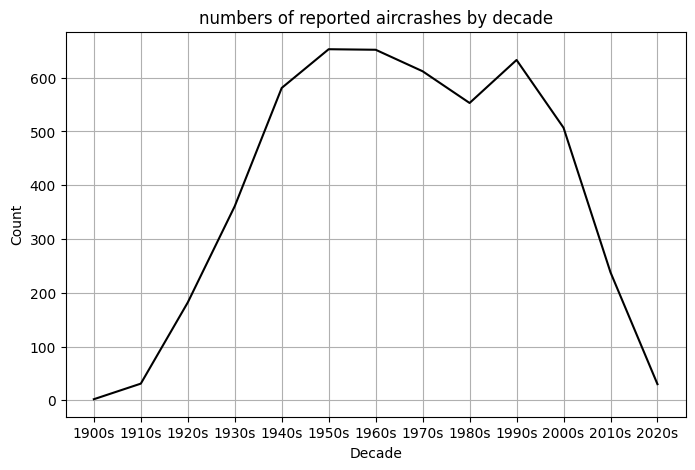

In [59]:
# A CHART TO SHOW THIS INFORMATION 


plt.figure(figsize=(8, 5))
plt.plot(df.Decade.value_counts().sort_index(), color='black')
plt.title("numbers of reported aircrashes by decade")
plt.xlabel("Decade")
plt.ylabel("Count")
plt.grid(True)
plt.show()

In [ ]:
# THE SEASON THAT AIRCRAFT CRASHES OFTEN OCCUE IN OR OCCUR THE MOST IN 

# FIRSTLY I NEED TO CREATE A BIN TO GET A NEW COLUMN NAMED SEASON

def get_season(Month):
    if Month in ["December", "January", "Febuary"]:
        return 'Winter'
    elif Month in ["March", "April", "May"]:
        return 'Spring'
    elif Month in ["June", "July", "August"]:
        return 'Summer'
    elif Month in ["September", 'October', "November"]:
        return 'Fall'

df['Season'] = df['Month'].apply(get_season)


<Axes: xlabel='Season'>

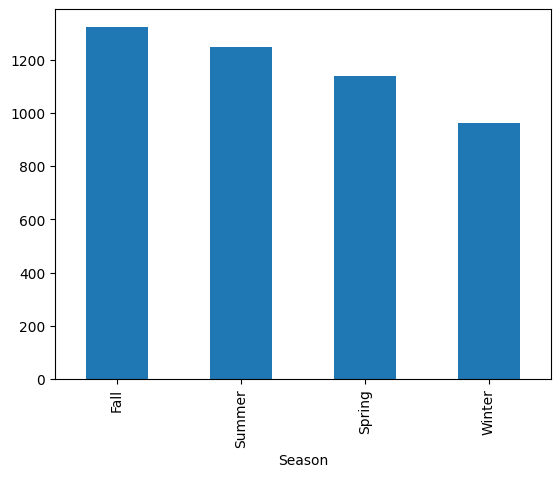

In [63]:
# A CHART TO SHOW THE DATA 

df.Season.value_counts().plot(kind = "bar")

<Axes: xlabel='Month'>

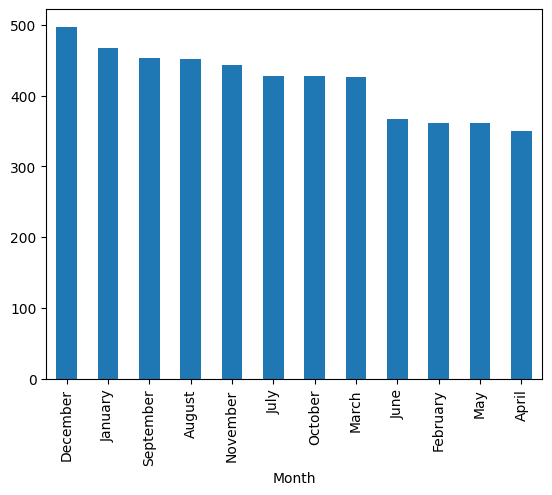

In [64]:
# THE MONTH WITH THE MOST REPORTED CASES 

df.Month.value_counts().plot(kind = "bar")

In [65]:
# NOW WE WANT TO FIND THE RELATIONSHIP BETWEEN THE TOTAL FATALITY RATE AND PARTIAL FATALITY RATE AND THE TOTAL SURVIVAL RATE 
# WE WANT TO KNOW WHAT PERCENTAGE TOTALY SURVIVED TO THE ONES WHO PARTIALLY SUVIVED (THAT IS SOME CAME OUT OF THE CRASH UNSCATHED) AND THE CRASHES THAT HAVE A TOTAL
# SURVIVAL RATE (THAT IS WHEN THE CRASH HAPPENED EVERY ONE CAME OUT UNSCATHED)


# FIRSTLY WE NEED TO CREATE A TABLE FOR THE NUMBER OF PEOPLE THAT SURVIVED 

df['Survivors'] = df['Aboard'] - df['Fatalities (air)']

# THEN WE NEED TO CREATE A COLUMN NAMED FATALITY(GROUPING) TO DO THAT WE NEED TO CREATE BINS FROM THE SURVVORS COLUMN, ABOARD COLUMN AND FATALITIES COLUMN 

def categorize_fatality(row):
    if row['Fatalities (air)'] == row['Aboard']:
        return 'Total Fatality'
    elif row['Fatalities (air)'] == 0:
        return 'Total Survival'
    else:
        return 'Non-Total Fatality'

df['Fatality_Bin'] = df.apply(categorize_fatality, axis=1)



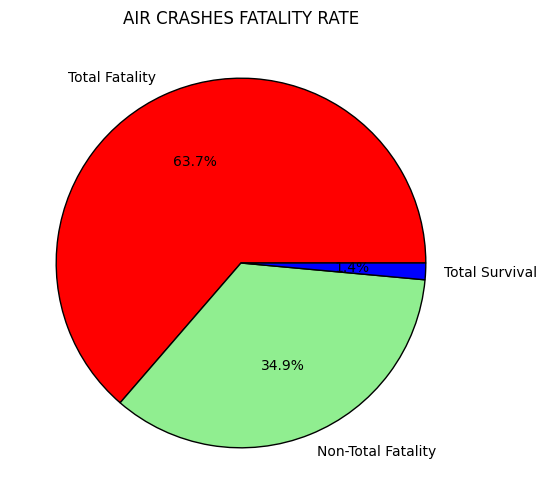

In [ ]:
# NOW TO SHOW THE RELATIONSHIP WE USE THE PIE CHART

bin_counts = df['Fatality_Bin'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(
    bin_counts.values, 
    labels=bin_counts.index,  
    colors=['red', 'lightgreen', 'blue'],
    autopct='%1.1f%%', 
    wedgeprops={'edgecolor': 'black'}
)
plt.title('AIR CRASHES FATALITY RATE'\\
          
plt.show() 



) missing from font(s) DejaVu Sans.nv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 13 (
  fig.canvas.draw()
) missing from font(s) DejaVu Sans.nv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


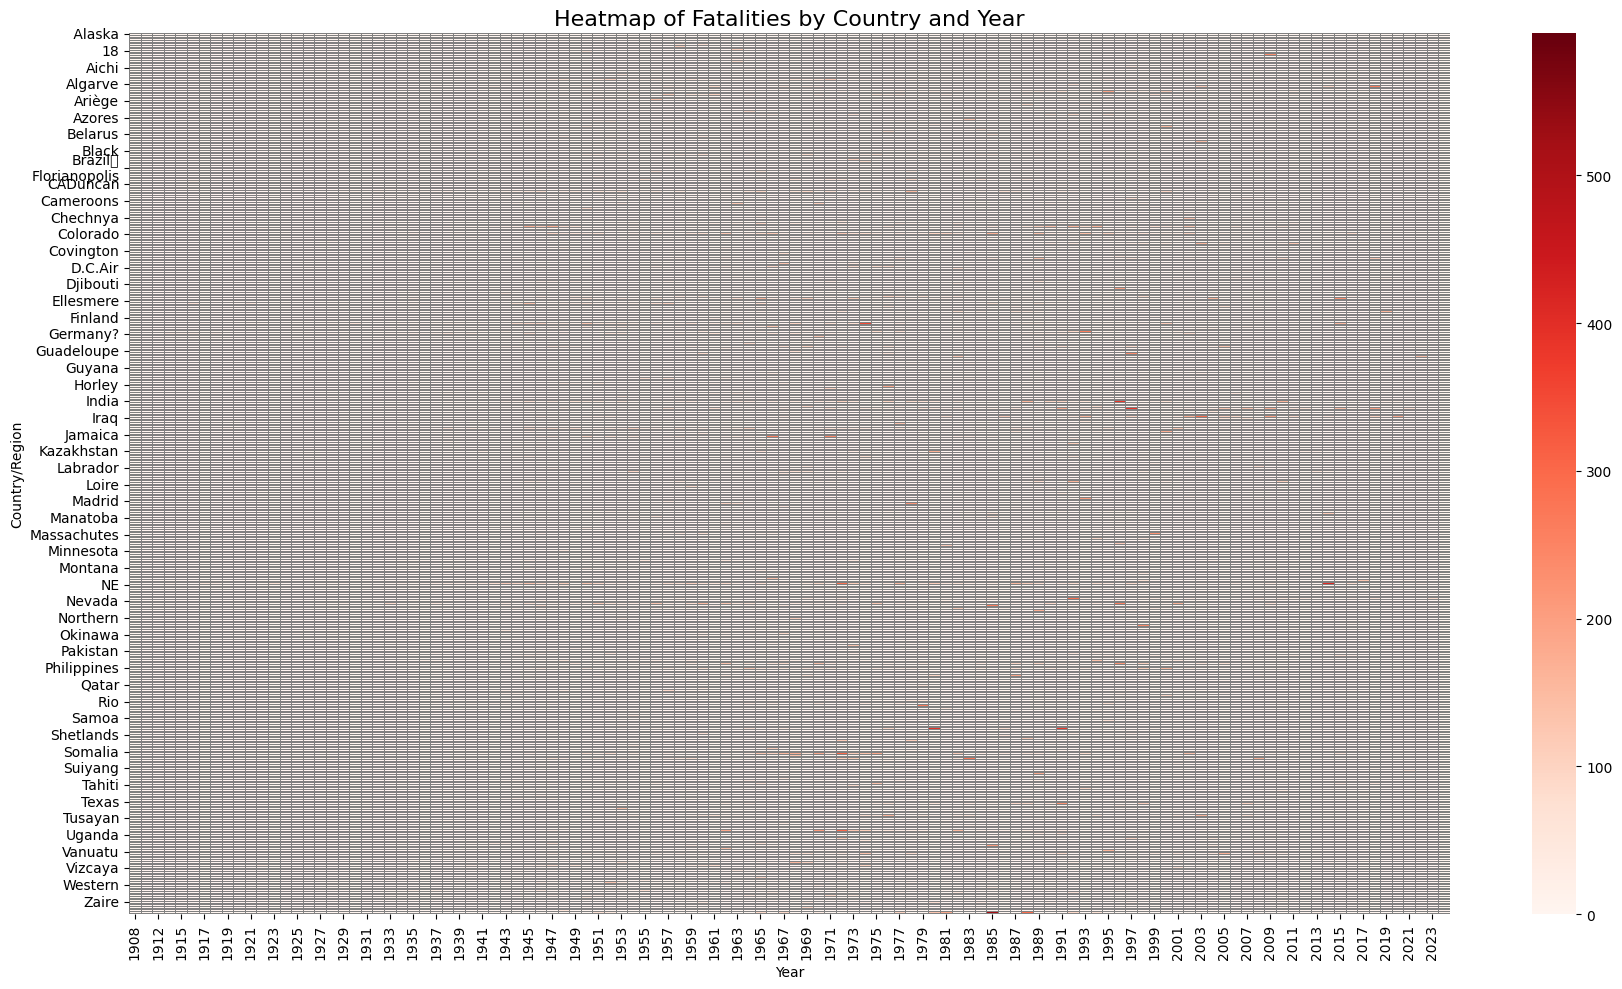

In [14]:
# to make the heat map 


# Creating a pivot table 
heat_data = df.pivot_table(
    index='Country/Region',
    columns='Year',
    values='Fatalities (air)',
    aggfunc='sum',
    fill_value=0
)


# plotting heat map
plt.figure(figsize=(18, 10))
sns.heatmap(heat_data, cmap='Reds', linewidths=0.5, linecolor='gray')

plt.title('Heatmap of Fatalities by Country and Year', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Country/Region')
plt.tight_layout()
plt.show()


In [14]:
# IT IS UNREADABLE HERE BUT WHEN YOU USE THE APP ENVIRONMENT YOU WILL BE ABLE TO USE AND NAVIGATE IT WELL 


# INSIGHTS AND OBSERVATIONS 

# Exploratory Data Analysis (EDA) on AIRCRAFT AIRCRASH ANALYSIS (1908 - 2024)
### Introduction 
Based on the data provided from “aircraftFullDataUpdated_2024.csv” I conducted an Exploratory Data Analysis to uncover patterns, trends, and insights about air crashes from 1908 till 2024.

## Data Overview
The dataset contains information about air crashes worldwide, including:
-	Date of these accidents (year, Month Day, Quarter, Decade, Season)
-	Country or Region
-	Aircraft Manufacturer 
-	Aircraft 
-	Aircraft Operator
-	Fatalities (Ground, Air)
-	Total Aboard
-	Survivor

## Decades Trends
From the Time-series visualization:
-	-	Air crashes show a general downward trend since the 1970s despite increase in air traffic in relation to population increase.
-	Peak years for accidents appear to be in the 1950s – 1960s with the total air-crashes of 653 and 652 respectively.
-	And a second peak in the 1990s with a total of 633 air-crashes with factors that included maintenance issues, pilot errors, weather conditions etc. which paved way for increase stricter safer airplane policies that made a significant decrease in air-crashes in the 2000s.
-	Significant improvement in safety since the 2000s therefore a significance decrease which is a 95.285% decrease.

## Seasonal Patterns
-	the season with the highest air-crashes is winter with a total of 1,326, which is slightly above the fall season with a total of 1,324 this is due to major factors like very harsh weather conditions, like now storms, heavy rainfalls, snow storms and hail storms.
-	the lowest season was the spring with 1,138 followed with the season of summer with 1,247 air-crashes.
-	No strong monthly seasonality apparent.

## Monthly Patterns 
-	Highest Crash Incidence in December: December has the highest number of air crashes with 497 air-crashes recorded which could be linked to holiday travel surges, bad winter weather, and hectic flight schedules.
-	Winter Months Dominate the Chart: December, January, and September top the list months that often involve: Seasonal transitions, Heavy passenger traffic, Weather volatility (snowstorms, fog, etc.)
-	April is the Safest Month.

## By Country/Region
-	High-risk areas appear to include: Southeast Asia, Northern South America, Central Africa.
-	Developed regions with high air traffic (North America, Western Europe) show relatively fewer accidents per flight volume.
-	Russia has the most accidents in absolute numbers with a total of 249 (due to high air traffic and war).
-	Some developing nations show higher accident rates per flight.
NOTE: a number of 480 air-crashes from unknown Countries/Regions were recorded.


## By Aircraft Type
-	Older aircraft models appear more frequently in accident data.
-	Military aircraft appear in a significant portion of accidents.

## By Operator
-	Cargo and private operations have higher accident rates.
-	Military operations account for a notable percentage.
-	Commercial airlines show improving safety records.

## Fatality Trends
-	Despite decreasing accident numbers, individual accidents can be catastrophic (high fatality events still occur).
-	Average fatalities per accident may be increasing due to larger aircraft.


## Fatality Rate 
From the pie chart a lot can be derived: 
-	High Risk of Total Fatality: 63.7% of air crashes result in total fatalities, meaning no survivors. This suggests that when an air crash is severe, it’s highly likely to be fatal for everyone on board. 
-	Proportion of Partial Survival: 34.9% of incidents result in non-total fatalities, meaning some people survive. This shows that not all crashes are completely deadly  there's a one-in-three chance of partial survival.
-	Total Survival is Extremely Rare: Only 1.4% of crashes result in everyone surviving. This emphasizes how rare it is for an air crash to be entirely non-fatal.

## Key Insights
1.	Safety Improvements: Aviation has become significantly safer over time despite increased traffic.
2.	Regional Disparities: Developing regions show higher accident rates, suggesting infrastructure and regulation play key roles.
3.	Human Factors: Remain the dominant contributor to accidents despite technological advances.

## This EDA suggests that while air travel has become remarkably safe, targeted improvements in training, maintenance, and infrastructure could further reduce accidents, particularly in developing aviation markets.


